<a href="https://colab.research.google.com/github/aysharega/M.Tech-Project-Thesis/blob/main/Hand_Gesture_VGG_16_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/dataset1/train'
valid_path = '/content/drive/MyDrive/Datasets/dataset1/test'

VGG NET BASED FEATURE SELECTION

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
 # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Datasets/dataset1/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy','AUC','Precision','Recall']
)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 5600 images belonging to 3 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 75 images belonging to 3 classes.


In [ ]:
r=model.fit_generator(training_set,
samples_per_epoch = 2000,
                         nb_epoch = 5,
                         validation_data = test,
                         nb_val_samples = 1000)


NameError: ignored

In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_generator,
  epochs=15,
  steps_per_epoch=8,
  validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
8/8 [==============================] - 27s 3s/step - loss: 0.8450 - accuracy: 0.6641 - auc: 0.8350 - precision: 0.6864 - recall: 0.6328 - val_loss: 0.0718 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/15
8/8 [==============================] - 20s 2s/step - loss: 0.2641 - accuracy: 0.9062 - auc: 0.9840 - precision: 0.9262 - recall: 0.8828 - val_loss: 0.0231 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/15
8/8 [==============================] - 17s 2s/step - loss: 0.1152 - accuracy: 0.9844 - auc: 0.9980 - precision: 0.9921 - recall: 0.9844 - val_loss: 0.0080 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/15
8/8 [==============================] - 18s 2s/step - loss: 0.0455 - accuracy: 1.0000 - auc: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_precision: 1.0000 - val_recall:

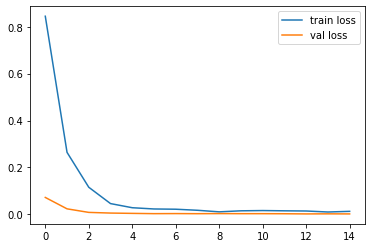

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

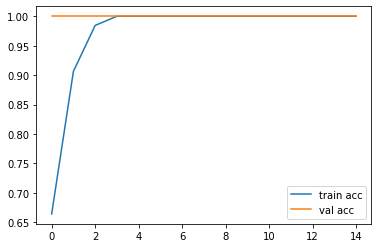

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_VGG16 HGR.h5')

In [ ]:

y_pred = model.predict(test_generator)
y_pred

array([[2.83149566e-04, 9.99388218e-01, 3.28564201e-04],
       [3.15754791e-04, 9.99358714e-01, 3.25580681e-04],
       [2.48844363e-03, 5.34542464e-03, 9.92166162e-01],
       [9.74044742e-05, 8.35305720e-04, 9.99067366e-01],
       [3.11816111e-04, 9.99259531e-01, 4.28552186e-04],
       [3.20075109e-04, 3.02715809e-03, 9.96652782e-01],
       [5.41715883e-04, 9.98762250e-01, 6.96000992e-04],
       [9.99370635e-01, 1.37260489e-04, 4.92190884e-04],
       [3.28463851e-04, 9.99350846e-01, 3.20716121e-04],
       [1.35833281e-04, 8.98271683e-04, 9.98965859e-01],
       [9.99414206e-01, 1.33956943e-04, 4.51913773e-04],
       [8.10515019e-04, 9.98470604e-01, 7.18862459e-04],
       [9.98344898e-01, 4.90717415e-04, 1.16436998e-03],
       [5.93346951e-04, 1.28016784e-03, 9.98126447e-01],
       [7.10270950e-04, 1.56686013e-03, 9.97722805e-01],
       [4.04933118e-04, 1.11997663e-03, 9.98475134e-01],
       [2.68524367e-04, 9.99433219e-01, 2.98266939e-04],
       [2.14760046e-04, 1.88070

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

y_pred

array([1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1,
       1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_VGG16 HGR.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Datasets/dataset1/test/2_thumb/frame_00_05_0073.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 4.,  4.,  4.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        ...,
        [ 5.,  5.,  5.],
        [ 4.,  4.,  4.],
        [ 5.,  5.,  5.]],

       [[ 8.,  8.,  8.],
        [ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        ...,
        [ 5.,  5.,  5.],
        [ 6.,  6.,  6.],
        [ 4.,  4.,  4.]],

       [[ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        ...,
        [ 5.,  5.,  5.],
        [ 5.,  5.,  5.],
        [ 4.,  4.,  4.]],

       ...,

       [[ 7.,  7.,  7.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        ...,
        [ 4.,  4.,  4.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.]],

       [[ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        [ 8.,  8.,  8.],
        ...,
        [ 5.,  5.,  5.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.]],

       [[ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        ...,
        [ 6.,  6.,  6.],
        [ 2.,  2.,  2.],
        [12., 12., 12.]]

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
img_data

array([[[[-103.92332 , -116.76331 , -123.664314],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.919395, -116.75939 , -123.66039 ],
         ...,
         [-103.919395, -116.75939 , -123.66039 ],
         [-103.92332 , -116.76331 , -123.664314],
         [-103.919395, -116.75939 , -123.66039 ]],

        [[-103.90763 , -116.74763 , -123.64863 ],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.91155 , -116.75155 , -123.65255 ],
         ...,
         [-103.919395, -116.75939 , -123.66039 ],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.92332 , -116.76331 , -123.664314]],

        [[-103.915474, -116.75547 , -123.65647 ],
         [-103.915474, -116.75547 , -123.65647 ],
         [-103.919395, -116.75939 , -123.66039 ],
         ...,
         [-103.919395, -116.75939 , -123.66039 ],
         [-103.919395, -116.75939 , -123.66039 ],
         [-103.92332 , -116.76331 , -123.664314]],

        ...,

        [[-103.91155 , -116.75155 , -1

In [ ]:
model.predict(img_data)

array([[9.9606544e-01, 3.2946044e-03, 6.4001681e-04]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([False])

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
import numpy as np

data3 = np.arange(122304).reshape(52, 2352 )

data3 = data3.reshape((data3.shape[0]*3, 28, 28))

print(data3.shape)

(156, 28, 28)


In [ ]:
#confusion matrix
#1.Predict classes
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report

print(class_labels)

print(confusion_matrix(test_generator.classes, predicted_classes))
print(classification_report(test_generator.classes, predicted_classes))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


['1_stop', '2_thumb', '3_ok']
[[16  9  0]
 [17  8  0]
 [17  8  0]]
              precision    recall  f1-score   support

           0       0.32      0.64      0.43        25
           1       0.32      0.32      0.32        25
           2       0.00      0.00      0.00        25

    accuracy                           0.32        75
   macro avg       0.21      0.32      0.25        75
weighted avg       0.21      0.32      0.25        75



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from __future__ import division, print_function
import sys
import os
import glob
import re
import numpy as np
import tensorflow as tf
import tensorflow as tf

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
# Keras
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
MODEL_PATH = 'model_VGG16 HGR.h5'

# Load your trained model
model = load_model(MODEL_PATH)

In [46]:
img_path = "/content/drive/MyDrive/Datasets/dataset1/test/1_stop/frame_04_01_0048.png"

#img_path = "/content/c25_3.jpg"

img = image.load_img(img_path, target_size=(224, 224))

# Preprocessing the image
x = image.img_to_array(img)
# x = np.true_divide(x, 255)
## Scaling
x = x / 255
x = np.expand_dims(x, axis=0)

# Be careful how your trained model deals with the input
# otherwise, it won't make correct prediction!
# x = preprocess_input(x)

preds = model.predict(x)
print(preds)
maxElement = np.amax(preds)
print(maxElement)
preds = np.argmax(preds, axis=1)
print(preds)
if preds == 0:
    preds = "1_stop"
elif preds == 1:
    preds = "2_thumb"
elif preds == 2:
    preds = "3_ok"



print(preds)

[[9.9784935e-01 6.0067512e-04 1.5499914e-03]]
0.99784935
[0]
1_stop


In [60]:

for i in range(24):
  j=i+29
  img_path = "/content/drive/MyDrive/Datasets/dataset1/test/1_stop/frame_04_01_00{}.png".format(j)
 

  img = image.load_img(img_path, target_size=(224, 224))

  # Preprocessing the image
  x = image.img_to_array(img)
  # x = np.true_divide(x, 255)
  ## Scaling
  x = x / 255
  x = np.expand_dims(x, axis=0)

  # Be careful how your trained model deals with the input
  # otherwise, it won't make correct prediction!
  #x = preprocess_input(x)

  preds = model.predict(x)
  maxElement = np.amax(preds)
  preds = np.argmax(preds, axis=1)

  if preds == 0:
    preds = "1_stop"
  elif preds == 1:
    preds = "2_thumb"
  elif preds == 2:
    preds = "3_ok"

  print(preds)





1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop
1_stop


In [66]:
for i in range(24):
  j=i+73
  img_path = "/content/drive/MyDrive/Datasets/dataset1/test/2_thumb/frame_00_05_00{}.png".format(j)
 

  img = image.load_img(img_path, target_size=(224, 224))

  # Preprocessing the image
  x = image.img_to_array(img)
  # x = np.true_divide(x, 255)
  ## Scaling
  x = x / 255
  x = np.expand_dims(x, axis=0)

  # Be careful how your trained model deals with the input
  # otherwise, it won't make correct prediction!
  #x = preprocess_input(x)

  preds = model.predict(x)
  maxElement = np.amax(preds)
  preds = np.argmax(preds, axis=1)

  if preds == 0:
    preds = "1_stop"
  elif preds == 1:
    preds = "2_thumb"
  elif preds == 2:
    preds = "3_ok"

  print(preds)


2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb
2_thumb


In [72]:
for i in range(9):
  j=i+ 1
  img_path = "/content/drive/MyDrive/Datasets/dataset1/test/3_ok/frame_00_07_000{}.png".format(j)
 

  img = image.load_img(img_path, target_size=(224, 224))

  # Preprocessing the image
  x = image.img_to_array(img)
  # x = np.true_divide(x, 255)
  ## Scaling
  x = x / 255
  x = np.expand_dims(x, axis=0)

  # Be careful how your trained model deals with the input
  # otherwise, it won't make correct prediction!
  #x = preprocess_input(x)

  preds = model.predict(x)
  maxElement = np.amax(preds)
  preds = np.argmax(preds, axis=1)

  if preds == 0:
    preds = "1_stop"
  elif preds == 1:
    preds = "2_thumb"
  elif preds == 2:
    preds = "3_ok"

  print(preds)

3_ok
3_ok
3_ok
3_ok
3_ok
3_ok
3_ok
3_ok
3_ok
